<a href="https://colab.research.google.com/github/alanwuha/ce7455-nlp/blob/master/mnist-neural-nets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Train a simple MNIST Neural nets

Let's train a simple neural network to classify MNIST hand-written digit.

### 1. Download the dataset

In [0]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters
input_size = 784
hidden_size = 500
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

# MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='.',
                                           train=True,
                                           transform=transforms.ToTensor(),
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='.',
                                          train=False,
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

torch.Size([28, 28]), Label: 7


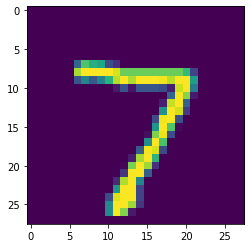

In [9]:
image, label = test_dataset[0]
# reduce bath=1 to no batch
image = image[0]
print(f'{image.size()}, Label: {label}')
plt.imshow(image)

### 2. Initiate the Neural Network (multi-layer perceptron)

The network has 2 layers, with ReLu activation in between.

In [0]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters
input_size = 784
hidden_size = 500
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super(NeuralNet, self).__init__()
    self.fc1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.fc2 = nn.Linear(hidden_size, num_classes)

  def forward(self, x):
    out = self.fc1(x)
    out = self.relu(out)
    out = self.fc2(out)
    return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

### 3. Train the network

In [15]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(train_loader):
    # Move tensors to the configured device
    images = images.reshape(-1, 28*28).to(device)
    labels = labels.to(device)

    # Forward pass
    outputs = model(images)
    loss = criterion(outputs, labels)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (i+1) % 100 == 0:
      print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
            .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

Epoch [1/5], Step [100/600], Loss: 0.0105
Epoch [1/5], Step [200/600], Loss: 0.0133
Epoch [1/5], Step [300/600], Loss: 0.0119
Epoch [1/5], Step [400/600], Loss: 0.0022
Epoch [1/5], Step [500/600], Loss: 0.0144
Epoch [1/5], Step [600/600], Loss: 0.0458
Epoch [2/5], Step [100/600], Loss: 0.0173
Epoch [2/5], Step [200/600], Loss: 0.0046
Epoch [2/5], Step [300/600], Loss: 0.0008
Epoch [2/5], Step [400/600], Loss: 0.0099
Epoch [2/5], Step [500/600], Loss: 0.0057
Epoch [2/5], Step [600/600], Loss: 0.0240
Epoch [3/5], Step [100/600], Loss: 0.0011
Epoch [3/5], Step [200/600], Loss: 0.0173
Epoch [3/5], Step [300/600], Loss: 0.0090
Epoch [3/5], Step [400/600], Loss: 0.0007
Epoch [3/5], Step [500/600], Loss: 0.0020
Epoch [3/5], Step [600/600], Loss: 0.0038
Epoch [4/5], Step [100/600], Loss: 0.0014
Epoch [4/5], Step [200/600], Loss: 0.0044
Epoch [4/5], Step [300/600], Loss: 0.0040
Epoch [4/5], Step [400/600], Loss: 0.0026
Epoch [4/5], Step [500/600], Loss: 0.0090
Epoch [4/5], Step [600/600], Loss:

### 4. Test the network

In [16]:
# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
  correct = 0
  total = 0
  for images, labels in test_loader:
    images = images.reshape(-1, 28*28).to(device)
    labels = labels.to(device)
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

  print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))

# Save the model checkpoint
torch.save(model.state_dict(), 'model.pt')

Accuracy of the network on the 10000 test images: 98.28 %
